# Author : Bharath B
# Task 1 : Prediction using Supervised Machine Learning
# GRIP @ The Sparks Foundation

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

In [1]:
# import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Step 1- Reading the data from given source

In [2]:
# Reading data from remote link
b_data = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
b_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Step 2 - Checking Null values

In [3]:
b_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values present in the given dataset.

# Step 3 - Data Visualization

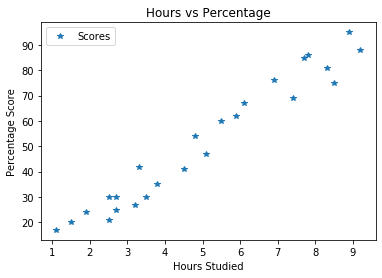

In [4]:
b_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Step 4 - Data Preprocessing

In [5]:
X = b_data.iloc[:, :-1].values  
y = b_data.iloc[:, 1].values

# Step 5 - Model Training
Splitting the data into 60 percent training and 40 percent testing data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 
print("Training complete.")

Training complete.


# Step 6 - Plotting the Line of regression
Now since our model is trained now, its the time to visualize the best-fit line of regression.

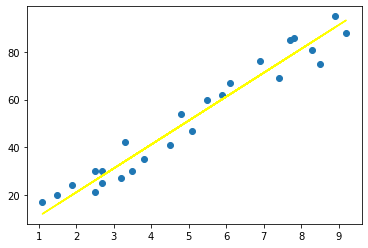

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='yellow')
plt.show()

# Step 7 - Making Predictions
For making prediction we use test-set data

In [8]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.1]
 [2.5]
 [2.5]
 [6.1]
 [8.9]
 [9.2]
 [2.7]
 [1.9]
 [8.3]
 [4.5]]


# Step 8 - Comparing Actual result to the Predicted Model result

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,17,11.953888
1,30,26.015563
2,21,26.015563
3,67,62.174156
4,95,90.297507
5,88,93.310723
6,30,28.024374
7,24,19.989131
8,81,84.271075
9,41,46.103670


In [10]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9239779544983687
Test Score: 0.9760023406471554


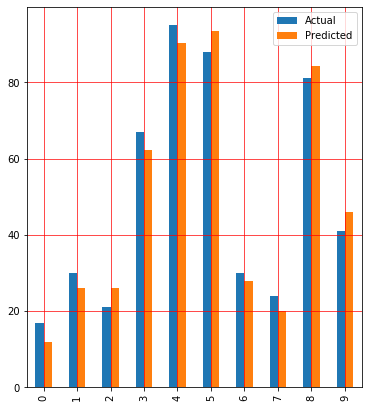

In [11]:
# Plotting the Bar graph between the actual and predicted value

df.plot(kind='bar',figsize=(6,7))
plt.grid(which='major', linewidth='0.7', color='red')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [12]:
# Testing the model with student studies for 9.25 hrs/ day
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.81292587026783


# Step 8 - Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.324641291146017
Mean Squared Error: 19.683840107577232
Root Mean Squared Error: 4.43664739500191
R-2: 0.9760023406471554
